### Doc

This module of the system provides the change in emotions of the movie as it progresses. The change is measured against every scene of the movie. Using The NLU APIs provided by IBM Watson, the emotion of each scene from the script of the movie is analysed. Then a plot is produced that describes the trend in the common emotions per scene. <br>

##### Input

Movie, and emotion to be described(optional)

##### Output

A plot of trend of emotion through the course of the movie

In [2]:
import json
import numpy as np
import pandas as pd
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 \
  import Features, EntitiesOptions, KeywordsOptions, EmotionOptions

natural_language_understanding = NaturalLanguageUnderstandingV1(
  username='06320980-d791-4920-834b-3c5368522608',
  password='UKVXqFnwnNnZ',
  version='2018-03-16')


### Function to Read

In [3]:
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
from io import StringIO

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = StringIO()
    codec = 'ascii'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos=set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

In [4]:
dic = {}
dic['Haider.pdf'] = 'CUT TO'
dic['Highway.pdf'] = 'Sc # '
dic['JabWeMet.pdf'] = 'Sc # '
dic['Kaminey.pdf'] = 'CUT TO'
dic['Maqbool.pdf'] = 'SC. '
dic['Masaan.pdf'] = 'CUT TO'
dic['NEERJA.pdf'] = 'CUT TO'
dic['Pink.pdf'] = 'CUT TO'
dic['Queen.pdf'] = 'CUT TO'
dic['Raman Raghav 2_0.pdf'] = 'CUT TO'
dic['Rang De Basanti Script - Film Companion-min.pdf'] = 'CUT TO'
dic['Rockstar.pdf'] = 'Sc # '


{'Haider.pdf': 'CUT TO',
 'Highway.pdf': 'Sc # ',
 'JabWeMet.pdf': 'Sc # ',
 'Kaminey.pdf': 'CUT TO',
 'Maqbool.pdf': 'SC. ',
 'Masaan.pdf': 'CUT TO',
 'NEERJA.pdf': 'CUT TO',
 'Pink.pdf': 'CUT TO',
 'Queen.pdf': 'CUT TO',
 'Raman Raghav 2_0.pdf': 'CUT TO',
 'Rang De Basanti Script - Film Companion-min.pdf': 'CUT TO',
 'Rockstar.pdf': 'Sc # '}

In [5]:
movienames = ['Haider.pdf', 'Highway.pdf', 'JabWeMet.pdf', 'Kaminey.pdf', 'Maqbool.pdf', 'Masaan.pdf', 'NEERJA.pdf', 'Pink.pdf', 'Queen.pdf', 'Raman Raghav 2_0.pdf', 'Rang De Basanti Script - Film Companion-min.pdf', 'Rockstar.pdf']

In [6]:
emotions = ['anger', 'disgust', 'fear', 'joy', 'sadness']

In [52]:
class scene_by_scene():
    def __init__(self, moviename):
        self.moviename = moviename
        path = '../Bollywood-Data-master/scripts-data/' + moviename
        text = convert_pdf_to_txt(path)
        delimiter = dic[moviename]
        text2 = text.split(delimiter)
        self.main_table = pd.DataFrame()
        for i,txt in enumerate(text2):
            try:
                response = natural_language_understanding.analyze(
                  text = txt,
                  features=Features(
                    emotion=EmotionOptions())).get_result()
                mbst = response['emotion']['document']['emotion']
                mbst['scene'] = i
                print(i)
                table1 = pd.DataFrame.from_dict(mbst, orient='index').squeeze()

                self.main_table = self.main_table.append(table1)
            except:
                self.main_table = self.main_table.append({'anger':0, 'disgust':0,'fear':0, 'joy':0,'sadness':0, 'scene':i}, ignore_index=True)
        self.main_table['scene'] = self.main_table['scene'].astype(int)
        self.main_table = self.main_table.set_index('scene')

    def plot_emotion(self, emotion = ['anger', 'disgust','fear', 'joy','sadness']):
        return self.main_table[emotion].plot(figsize = (20,15))
    
    def ret_dataframe(self):
        return self.main_table
    
    

In [49]:
def emotionRelater(x,y):
    range=20
    #We can downsample too if required
    arr = []
    for index, emotionname in enumerate(emotions):
        x1 = x[emotionname]
        x2 = y[emotionname]
        x1=x1[1:range]
        x2=x2[1:range]
        relation=np.corrcoef(x1,x2)
        relativeIndex=relation[1][0]
        print(relativeIndex)
        arr.append(relativeIndex)
        
    return np.sum(arr)

In [51]:
def read_dataframe(moviename1):
    movie_dataframe1 = pd.read_csv('../ScriptsDF/'+moviename1)
    return movie_dataframe1

In [ ]:
movie_dataframe1 = read_dataframe(moviename1)
arr = {}
for moviename in movienames:
    if moviename == moviename1:
        continue
    else:
        movie_dataframe2 = read_dataframe(moviename)
    arr[moviename] = emotionRelater(movie_dataframe1,movie_dataframe2)

    
sorted_names = sorted(arr)
print(sorted_names)


In [50]:
emotionRelater(movie_dataframe1,movie_dataframe2)

-0.1775475078397811
-0.04195049814166014
0.28199486135485957
0.2608225263692439
-0.10701043074751242


0.21630895099514985

In [ ]:
x = scene_by_scene('Pink.pdf')

In [ ]:
y = scene_by_scene('Queen.pdf')

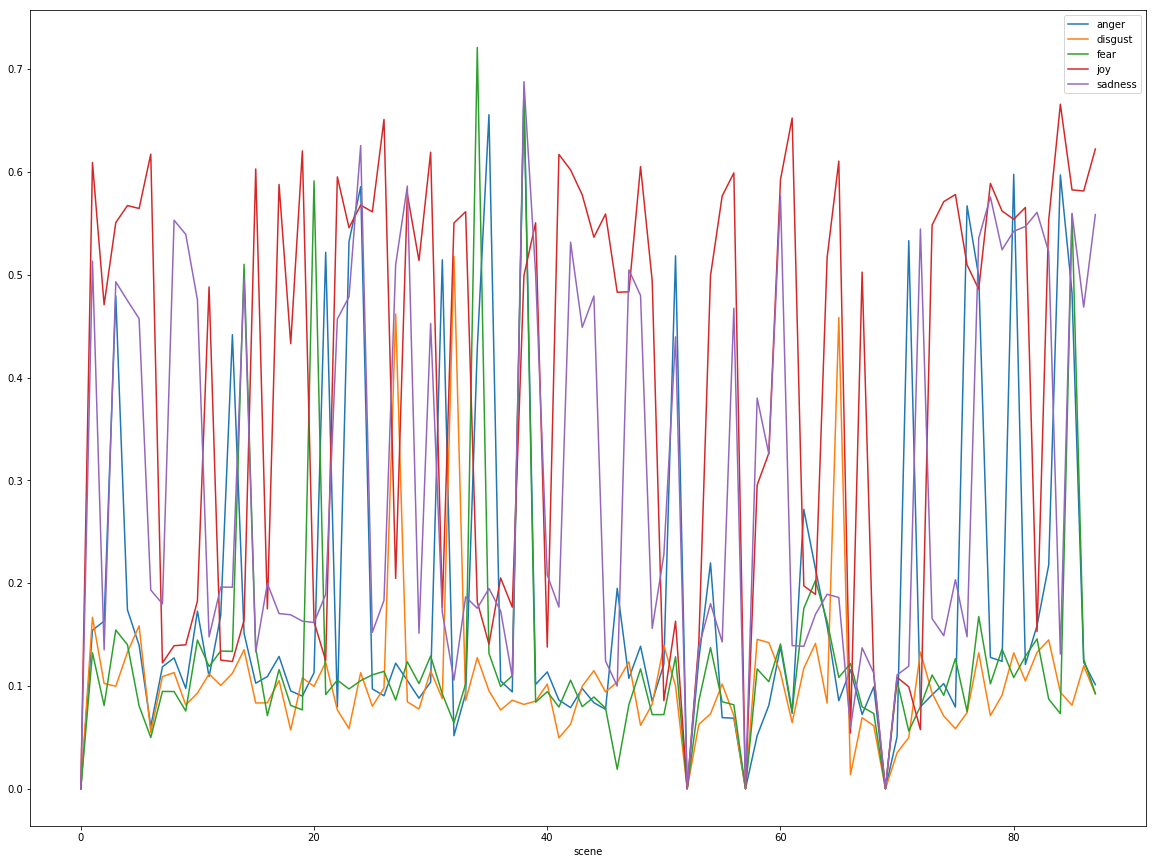

In [29]:
x.plot_emotion()

In [16]:
type(x)

__main__.scene_by_scene

In [44]:
movie_dataframe1 = x.ret_dataframe()
movie_dataframe2 = y.ret_dataframe()

In [45]:
movie_dataframe1

,anger,disgust,fear,joy,sadness
scene,,,,,
0,0.177368,0.087014,0.135800,0.148537,0.431617
1,0.117915,0.101882,0.136578,0.643524,0.118292
2,0.431579,0.070006,0.091315,0.545304,0.542839
3,0.092268,0.058506,0.479964,0.405984,0.508958
4,0.050260,0.047881,0.058155,0.588919,0.461335
5,0.460678,0.069814,0.134076,0.139759,0.145259
6,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.094755,0.085833,0.092583,0.591909,0.539769
8,0.100769,0.069553,0.119810,0.558725,0.520816


In [46]:
movie_dataframe2

,anger,disgust,fear,joy,sadness
scene,,,,,
0,0.095520,0.102164,0.162615,0.535375,0.088217
1,0.079623,0.101642,0.101158,0.558700,0.539918
2,0.086163,0.061069,0.123892,0.473983,0.527297
3,0.077855,0.068060,0.096859,0.562115,0.143429
4,0.116929,0.006580,0.264088,0.450087,0.258495
5,0.099172,0.074957,0.114842,0.166150,0.587978
6,0.090909,0.037318,0.120648,0.156681,0.121223
7,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.076923,0.045275,0.189232,0.234415,0.593028


In [ ]:
parfolder= '../ScriptsDF/'

for moviename in movienames:
    x = scene_by_scene(moviename)
    df = x.ret_dataframe()
    path = parfolder+moviename
    df.to_csv(path)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
53
54
55
56
58
59
60
62
63
64
65
66
67
68
